In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import plotly.plotly as py
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('CR2016-17AverageAQI.csv', skiprows=0)
df.head()

,S.No,FromDate,Average AQI
0,1,01-Jan-2016 - 00:00,70.10
1,2,02-Jan-2016 - 00:00,79.38
2,3,03-Jan-2016 - 00:00,84.83
3,4,04-Jan-2016 - 00:00,80.70
4,5,05-Jan-2016 - 00:00,82.98


In [4]:
df.FromDate = pd.to_datetime(df.FromDate)
df.set_index('FromDate', inplace=True)

In [5]:
df.head()

,S.No,Average AQI
FromDate,,
2016-01-01,1,70.10
2016-01-02,2,79.38
2016-01-03,3,84.83
2016-01-04,4,80.70
2016-01-05,5,82.98


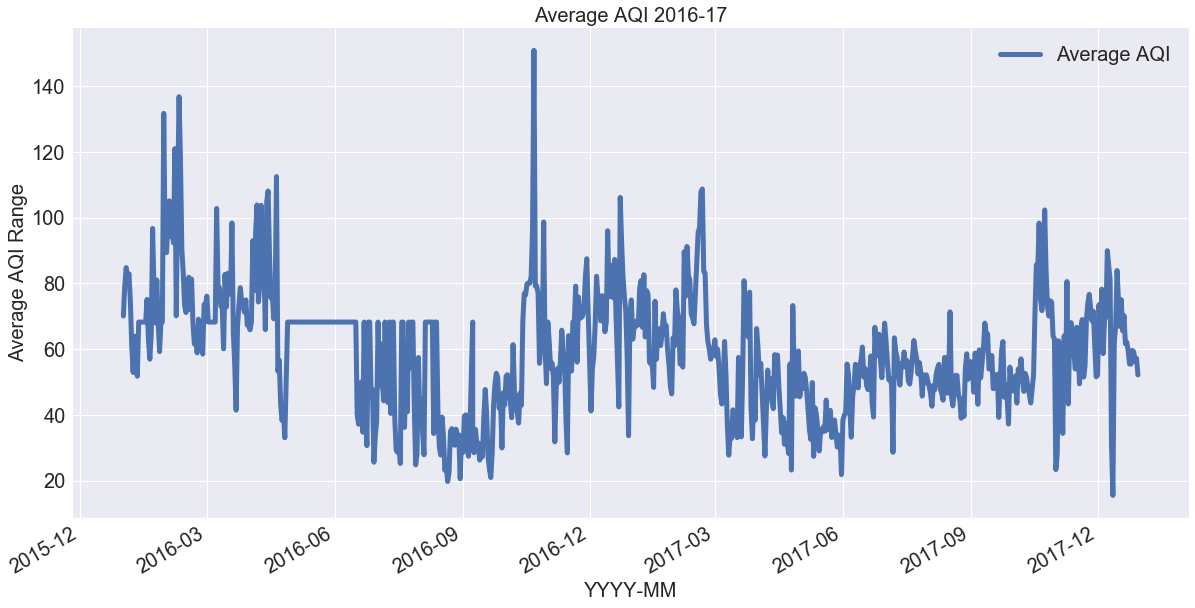

In [6]:
df['Average AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('YYYY-MM', fontsize=20)
plt.ylabel('Average AQI Range', fontsize=20)
plt.title("Average AQI 2016-17",fontsize=20)
plt.legend(fontsize=20)
plt.savefig("Average AQI Graph")

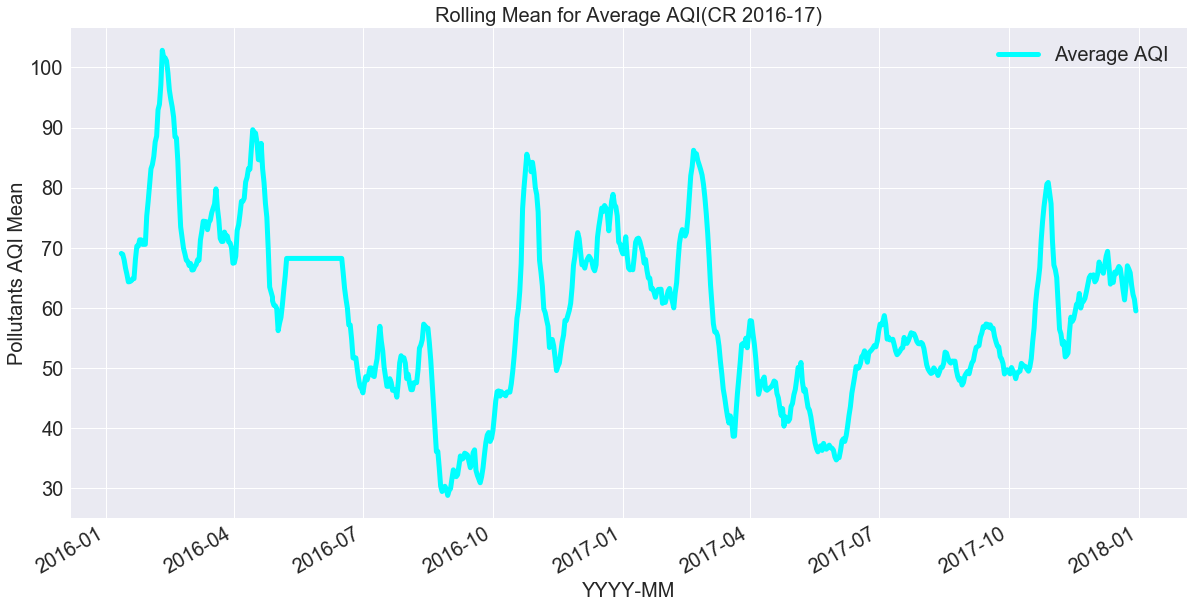

In [7]:
AVGAQI = df[['Average AQI']]
AVGAQI.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20, color="cyan")
plt.xlabel('YYYY-MM',size=20);
plt.ylabel('Pollutants AQI Mean', fontsize=20)
plt.title('Rolling Mean for Average AQI(CR 2016-17)', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('Rolling Mean')

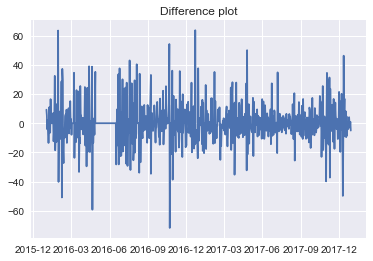

In [8]:
from statsmodels.tsa.stattools import acf, pacf
newavg=df['Average AQI']
diff = newavg - newavg.shift()
newdiff=diff.iloc[1:]
#newdiff
plt.plot(diff)
#plt.xlabel('')
plt.title('Difference plot')
plt.savefig('newdiff')

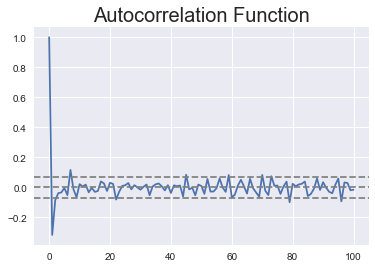

In [9]:
lag_acf = acf(newdiff, nlags=100)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function',fontsize=20)
plt.plot(figsize=(20,10))

plt.savefig('ACFFig')

In [10]:
#lag_acf

In [11]:
lag_pacf = pacf(newdiff, nlags=20, method='ols')
#lag_pacf

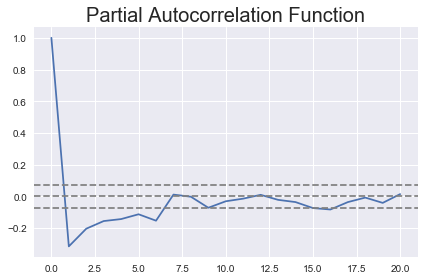

In [12]:
#plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(newdiff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function',fontsize=20)
plt.tight_layout()
plt.savefig('PACFFig')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


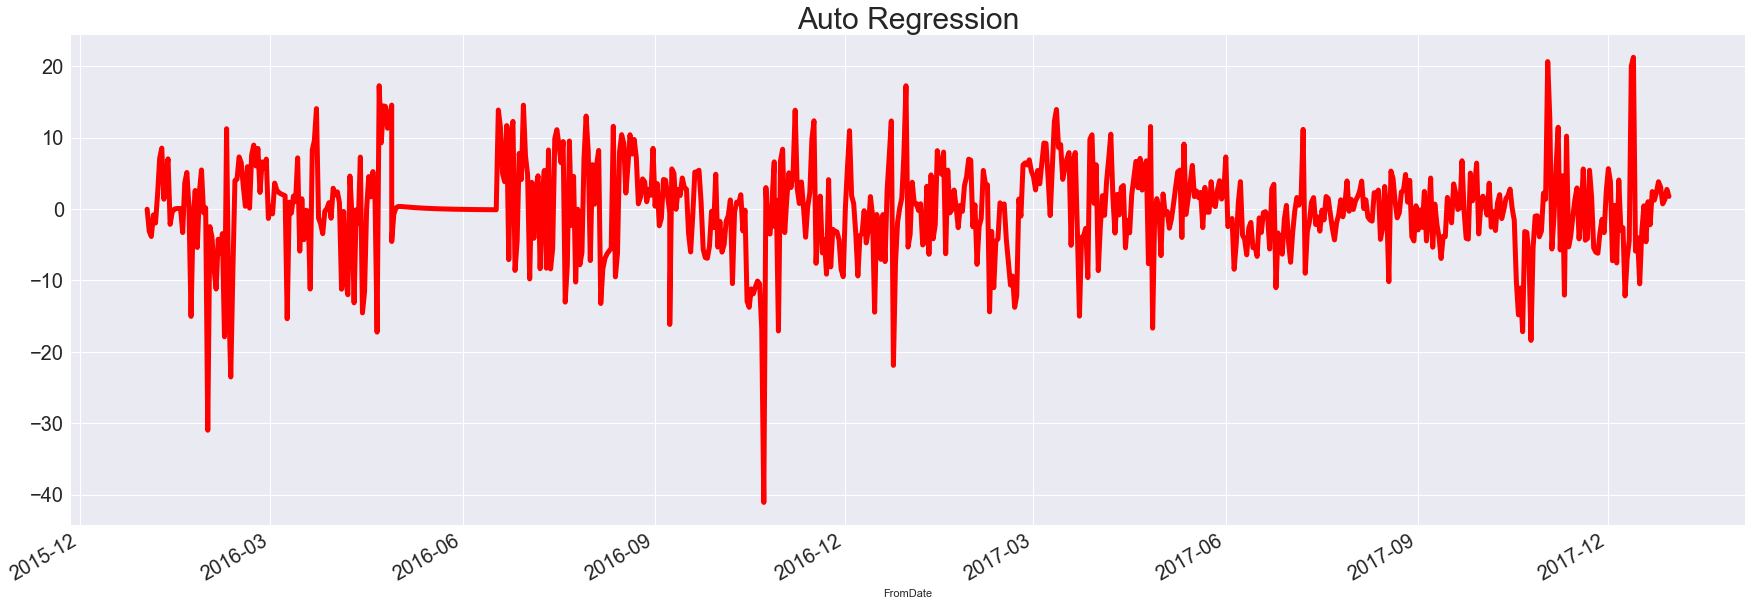

In [13]:
#AR Model
from statsmodels.tsa.arima_model import ARIMA
diff=AVGAQI.diff
model = ARIMA(AVGAQI, order=(1, 1, 2))  
results_AR = model.fit(disp=1)  
#AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
results_AR.fittedvalues.plot(figsize=(30,10), linewidth=5, fontsize=20, color='red')
#plt.plot(results_AR.fittedvalues,figsize=(20,10), color='red')
plt.title('Auto Regression', fontsize=30)
#plt.legend(fontsize=20)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-diff)**2))
plt.savefig('ARModel')

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


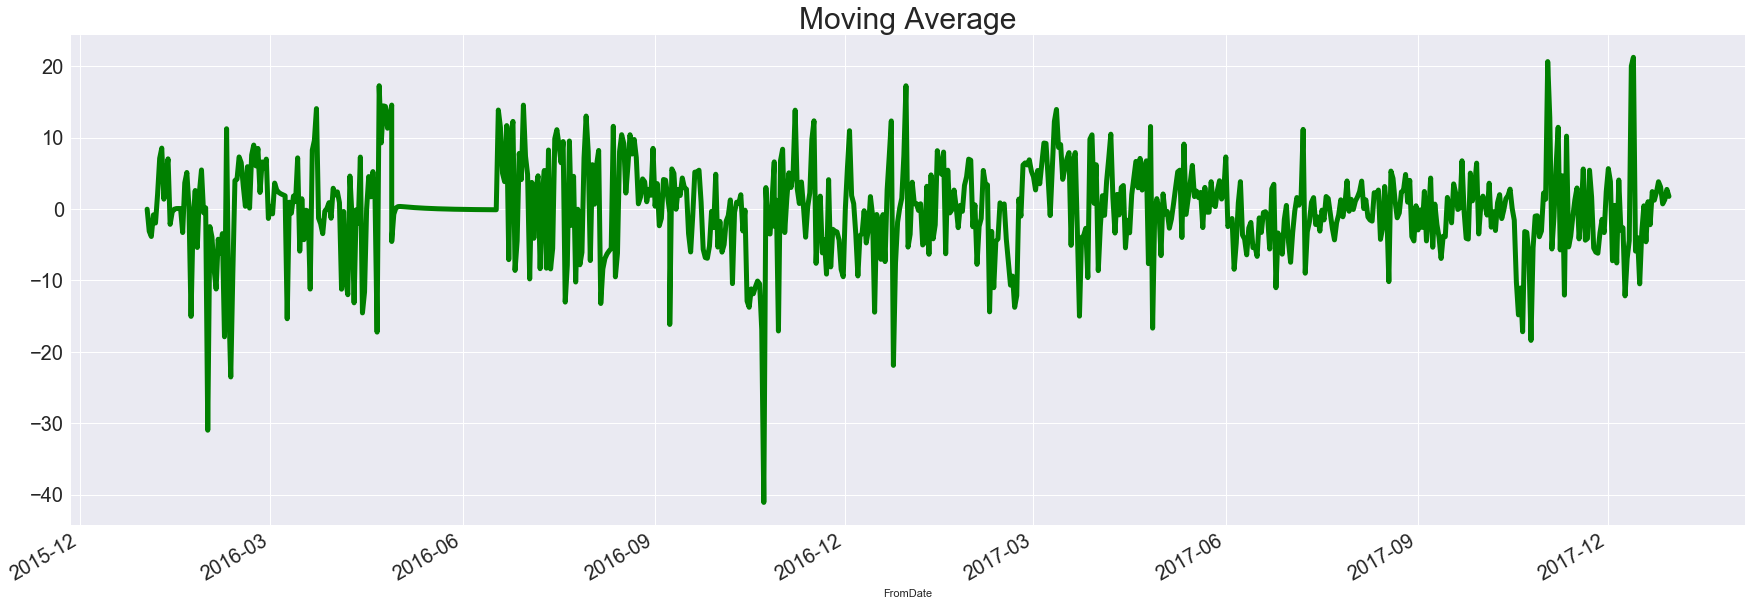

In [14]:
model = ARIMA(AVGAQI, order=(2, 1, 2))  
results_MA = model.fit(disp=-1)
#AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
results_AR.fittedvalues.plot(figsize=(30,10), linewidth=5, fontsize=20, color='green')
#plt.plot(results_MA.fittedvalues, color='green')
plt.title('Moving Average', fontsize=30)
plt.savefig('MovingAverage')
#plt.legend(fontsize=20)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


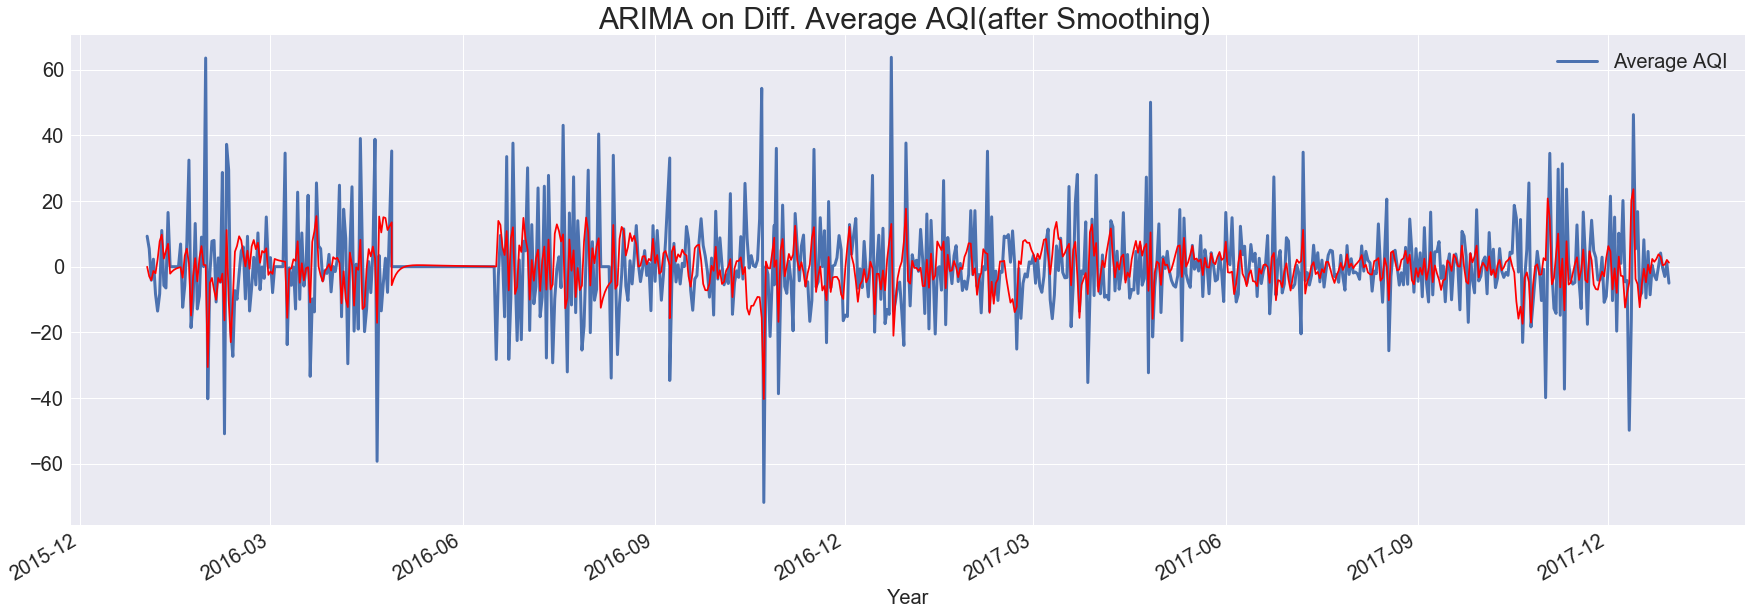

In [15]:
model = ARIMA(AVGAQI, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
AVGAQI.diff().plot(figsize=(30,10), linewidth=3, fontsize=20)
plt.plot(results_ARIMA.fittedvalues, color='red',)
plt.title('ARIMA on Diff. Average AQI(after Smoothing) ', fontsize=30)
plt.legend(fontsize=20)
plt.savefig('ARIMA after Smoothing ')
plt.xlabel('Year', fontsize=20);

In [16]:
#predictions
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head(10))
#print (predictions_ARIMA_diff.tail(10))

FromDate
2016-01-02   -0.021107
2016-01-03   -2.962618
2016-01-04   -4.141827
2016-01-05   -1.292763
2016-01-06   -2.025222
2016-01-07    2.124367
2016-01-08    7.730770
2016-01-09    9.737456
2016-01-10    2.467290
2016-01-11    4.775393
dtype: float64


In [17]:
#cumulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

FromDate
2016-01-02    -0.021107
2016-01-03    -2.983725
2016-01-04    -7.125552
2016-01-05    -8.418315
2016-01-06   -10.443536
dtype: float64


In [18]:
predictions_ARIMA_log = pd.Series(AVGAQI.iloc[1], index=AVGAQI.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

FromDate
2016-01-01         NaN
2016-01-02   -0.021107
2016-01-03   -2.983725
2016-01-04   -7.125552
2016-01-05   -8.418315
dtype: float64

In [19]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
#plt.plot(AVGAQI)
#plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [20]:
#plt.plot(predictions_ARIMA)

In [21]:
print(predictions_ARIMA)

FromDate
2016-01-01             NaN
2016-01-02    9.791140e-01
2016-01-03    5.060399e-02
2016-01-04    8.042891e-04
2016-01-05    2.207865e-04
2016-01-06    2.913599e-05
2016-01-07    2.437983e-04
2016-01-08    5.552155e-01
2016-01-09    9.405568e+03
2016-01-10    1.108959e+05
2016-01-11    1.314748e+07
2016-01-12    1.403486e+10
2016-01-13    1.671192e+09
2016-01-14    4.121381e+08
2016-01-15    1.678557e+08
2016-01-16    9.649403e+07
2016-01-17    7.020913e+07
2016-01-18    5.994456e+07
2016-01-19    2.059837e+06
2016-01-20    5.790830e+07
2016-01-21    1.381489e+10
2016-01-22    3.297952e+10
2016-01-23    1.135930e+04
2016-01-24    6.893259e+02
2016-01-25    9.286870e+03
2016-01-26    1.070234e+02
2016-01-27    1.408602e+03
2016-01-28    7.380380e+05
2016-01-29    1.282031e+06
2016-01-30    2.033837e+06
                  ...     
2017-12-01    4.223229e-11
2017-12-02    4.206613e-09
2017-12-03    4.128469e-12
2017-12-04    2.433683e-12
2017-12-05    8.318090e-16
2017-12-06    1.796

In [22]:
predictions_ARIMA.head(5)

FromDate
2016-01-01         NaN
2016-01-02    0.979114
2016-01-03    0.050604
2016-01-04    0.000804
2016-01-05    0.000221
dtype: float64

In [23]:
predictions_ARIMA.tail(5)

FromDate
2017-12-26    6.245427e-18
2017-12-27    9.583739e-18
2017-12-28    1.811302e-17
2017-12-29    1.415895e-16
2017-12-30    4.885470e-16
dtype: float64